<a href="https://colab.research.google.com/github/reinhardbuyabo/ICS4102/blob/main/ETS_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
!pip install -U statsmodels

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2025-09-23 12:54:16--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2025-09-23 12:54:17 (31.5 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [5]:
!head perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [8]:
df = pd.read_csv(
    'perrin-freres-monthly-champagne.csv',
    index_col='Month',
    skipfooter=2,
    parse_dates=True
)

/tmp/ipython-input-2110174868.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [9]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [10]:
df.columns = ['Sales']

<Axes: xlabel='Month'>

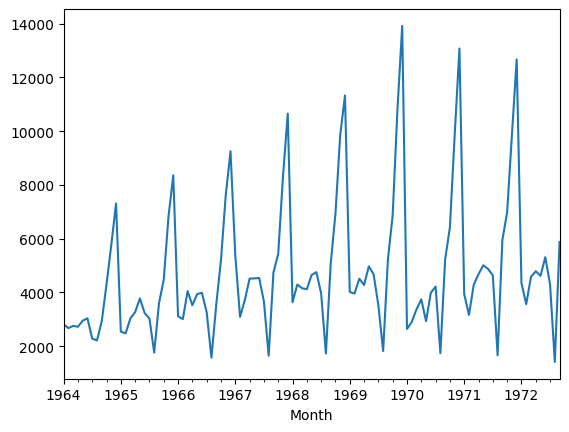

In [11]:
df['Sales'].plot()

seasonality
slight trend
seasonal pattern is not constant

In [12]:
df.index.freq = 'MS'

In [14]:
Ntest = 12 # seasonal cycle is 1 year
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [20]:
# boolean series
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12
)

res_hw = hw.fit()

In [21]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [22]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

<Axes: xlabel='Month'>

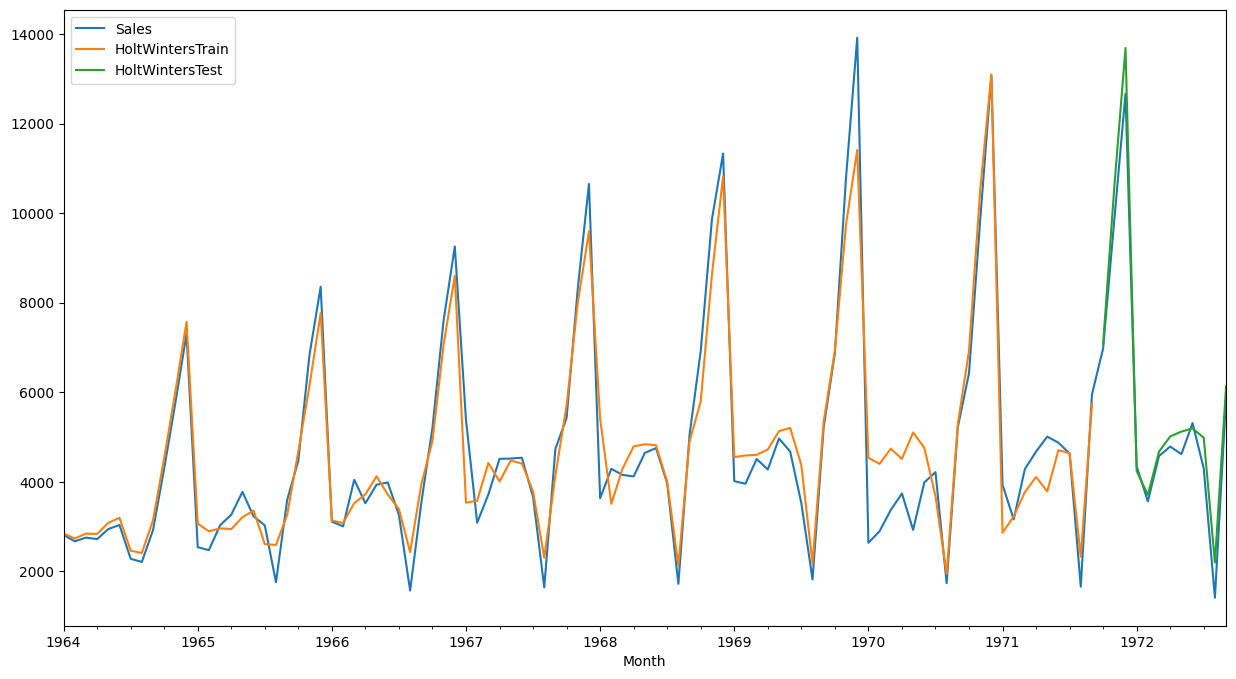

In [23]:
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 8))

In [24]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9170039191592038

In [26]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.9681685558801634